In [108]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


data = scipy.io.loadmat('train_32x32.mat')



## Load the data set and create test, training and dev samples
- Train set: provide examples to train the model
- development set: used as an interim test of the model once fit to the training set
- test set: final set of unseen data to test the performance of the fully trained model

In [109]:
x = data['X']
y = data['y']

[1]


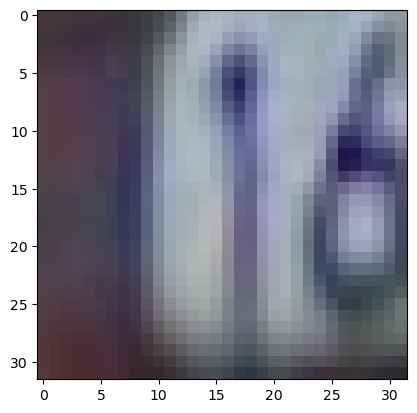

In [110]:
#check loaded correctly by showing one of the images

img_index = 20
plt.imshow(x[:,:,:,img_index])

print(y[img_index])


In [111]:
# reshape the data set

x = x.reshape(x.shape[0]*x.shape[1]*x.shape[2],x.shape[3]).T
y = y.reshape(y.shape[0],)

# Reference:
# For guidance on resahping/vectorising: https://www.hyperiondev.com/blog/index.php/2019/02/18/machine-learning/

In [112]:
from sklearn.model_selection import train_test_split

# first split out a test set from - the remaining will form either the development or training sets
x_train_dev, x_test, y_train_dev, y_test = train_test_split(x,y,test_size = 0.2, random_state=1) # 80% train/dev, 30% test

In [113]:
# create training and development sets
x_train, x_dev, y_train, y_dev = train_test_split(x_train_dev,y_train_dev,test_size = 0.2, random_state=1) # 80% train 20%dev

## Create a random forrest and see accuracy

In [114]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth = 10)
print(clf)

RandomForestClassifier(max_depth=10)


In [115]:
clf.fit(x_train, y_train)
print("Accuracy of Random Forrest:",clf.score(x_dev, y_dev))

Accuracy of Random Forrest: 0.558740721781418


## Tune the model using max depth parameter
Max depth has been selected to avoid the model over-fitting and not being able to generalise with unseen data.
Ref: https://towardsdatascience.com/mastering-random-forests-a-comprehensive-guide-51307c129cb1#:~:text=The%20most%20important%20of%20these,tree%20is%20allowed%20to%20make.

In [116]:
max_depths = range(2,15)

max_depths_scores = [] 
for d in max_depths:
    clf = RandomForestClassifier(max_depth = d, random_state = 6)
    clf.fit(x_dev, y_dev.ravel())
    score = clf.score(x_test, y_test)
    max_depths_scores.append(score) # storing accuracy of training set

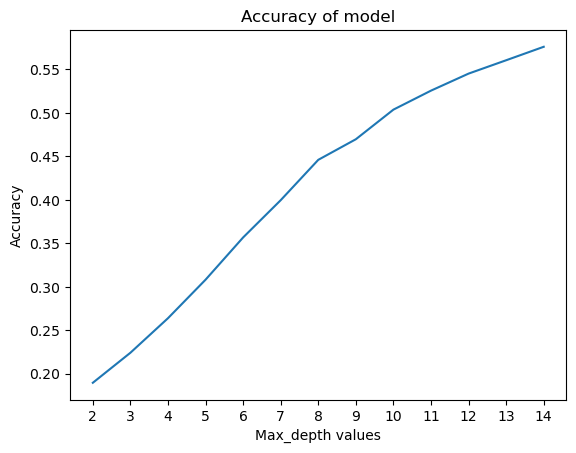

In [117]:
fig, ax = plt.subplots()
ax.plot(max_depths, max_depths_scores)
plt.xlabel("Max_depth values")
plt.ylabel("Accuracy")
plt.title("Accuracy of model")
ax.xaxis.set_ticks(max_depths);

In [118]:
best_depth = max_depths[np.argmax(max_depths_scores)]
print('Best performance reached at depth of:', best_depth)

Best performance reached at depth of: 14


Based on the above, we can see the best depth is at 14 - this will be used in the model moving forward

## Confusion Matrix

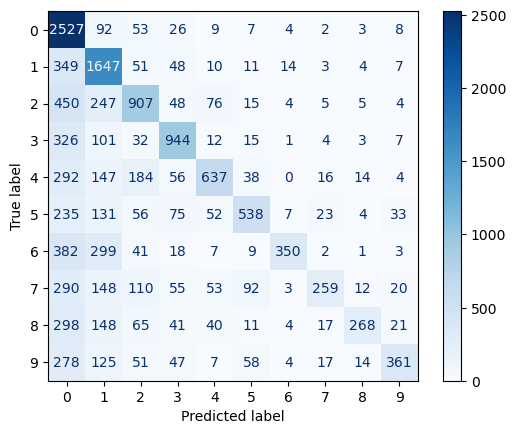

In [119]:
clf = RandomForestClassifier(max_depth = 14, random_state = 6)
clf.fit(x_dev, y_dev.ravel())

y_pred = clf.predict(x_test).reshape(-1,1)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
plt.show()


Class that struggled the most is 0: for 0, there were 2900 false positives

In [120]:
FP = cm.sum(axis=0) - np.diag(cm)   
FN = cm.sum(axis=1) - np.diag(cm) 
TP = pd.Series(np.diag(cm), index=list("0123456789"))
TN = np.matrix(cm).sum() - (FP + FN + TP)  

FP[0]
# reference for how to calculate above on 10x10 confusion matrix:
# https://stackoverflow.com/questions/61389262/how-do-i-interpret-this-1010-confusion-matrix


2900

## Accuracy, precision, recall and F1 score for the model

In [121]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test,y_pred,average='macro')

precision = precision_score(y_test,y_pred,average='macro')

recall = recall_score(y_test,y_pred,average='macro')

print(f'Final Statistics: \nAccuracy: {accuracy}\nF1 Score: {f1}\nPrecision: {precision}\nRecall: {recall}')

Final Statistics: 
Accuracy: 0.5758940758940759
F1 Score: 0.5354550086507796
Precision: 0.6890652024015942
Recall: 0.5019072399426505
